**Date**: 23 Febuary 2025 <br>
**Programmer**: Jinnaphat Phansri <br>


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreenidhihipparagi/google-stock-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shreenidhihipparagi/google-stock-prediction/versions/2


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/root/.cache/kagglehub/datasets/shreenidhihipparagi/google-stock-prediction/versions/2/GOOG.csv')
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [3]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [4]:
df.shape

(1258, 14)

In [5]:
selected_df = df.iloc[:,1:3]
selected_df.head()

,date,close
0,2016-06-14 00:00:00+00:00,718.27
1,2016-06-15 00:00:00+00:00,718.92
2,2016-06-16 00:00:00+00:00,710.36
3,2016-06-17 00:00:00+00:00,691.72
4,2016-06-20 00:00:00+00:00,693.71


In [6]:
selected_df['date'] = pd.to_datetime(selected_df['date'])
selected_df.set_index("date",inplace=True)
selected_df.head()

,close
date,
2016-06-14 00:00:00+00:00,718.27
2016-06-15 00:00:00+00:00,718.92
2016-06-16 00:00:00+00:00,710.36
2016-06-17 00:00:00+00:00,691.72
2016-06-20 00:00:00+00:00,693.71


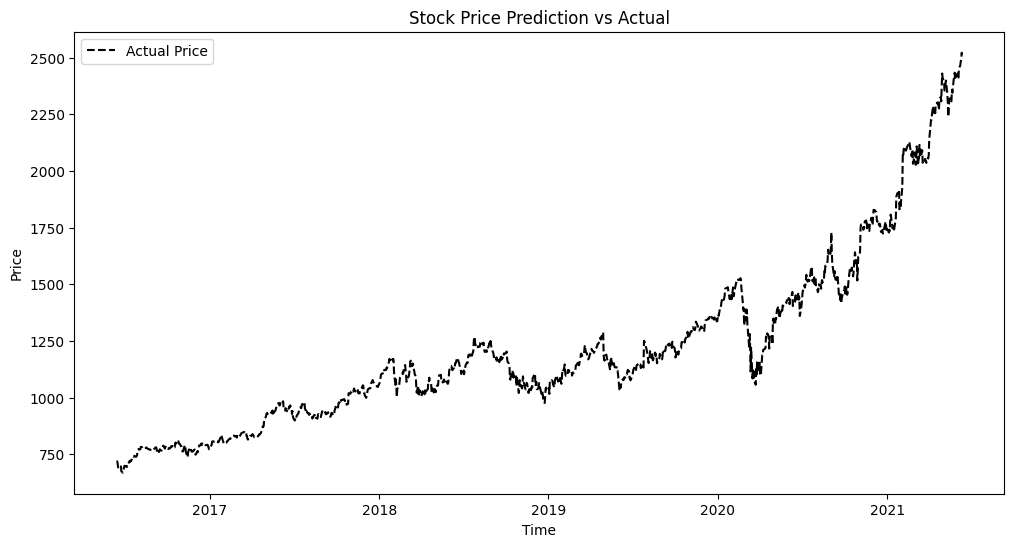

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(selected_df['close'], label='Actual Price', color='black', linestyle='dashed')

plt.legend()
plt.title("Stock Price Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


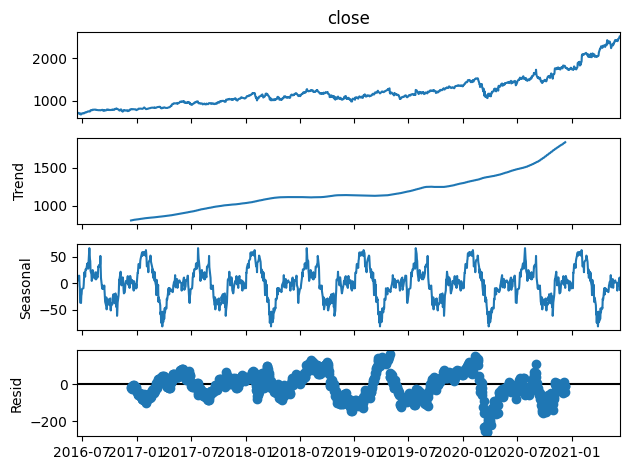

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(selected_df["close"], model="additive", period=252) # days in 1 year
decomposition.plot()
plt.show()


In [9]:
"""
Trend: Google stock has a long-term upward trend.
Seasonality: Stock prices fluctuate seasonally every year.
Residual: The residual component represents unexplained fluctuations after removing trend and seasonality.
"""

'\nTrend: Google stock has a long-term upward trend.\nSeasonality: Stock prices fluctuate seasonally every year.\nResidual: The residual component represents unexplained fluctuations after removing trend and seasonality.\n'

In [10]:
### H0: The time series is NOT stationary.
### H1: The time series is stationary.
### Reject H0 if p-Value is less than 0.05
from statsmodels.tsa.stattools import adfuller
result = adfuller(selected_df['close'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: 1.968587
p-value: 0.998631
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [11]:
"""
We got the p-value: 0.998631, So, We can't reject null hypothesis. Now we have to trust that is not stationary
"""

"\nWe got the p-value: 0.998631, So, We can't reject null hypothesis. Now we have to trust that is not stationary\n"

In [12]:
"""
Simple Moving Average:
Calculate SMA 10, SMA 50 and SMA 200
"""
selected_df['SMA10'] = selected_df['close'].rolling(window=10).mean()

selected_df['SMA50'] = selected_df['close'].rolling(window=50).mean()

selected_df['SMA200'] = selected_df['close'].rolling(window=200).mean()

In [13]:
selected_df.head()

,close,SMA10,SMA50,SMA200
date,,,,
2016-06-14 00:00:00+00:00,718.27,NaN,NaN,NaN
2016-06-15 00:00:00+00:00,718.92,NaN,NaN,NaN
2016-06-16 00:00:00+00:00,710.36,NaN,NaN,NaN
2016-06-17 00:00:00+00:00,691.72,NaN,NaN,NaN
2016-06-20 00:00:00+00:00,693.71,NaN,NaN,NaN


In [14]:
selected_df.tail()

,close,SMA10,SMA50,SMA200
date,,,,
2021-06-07 00:00:00+00:00,2466.09,2423.689,2310.5564,1905.73740
2021-06-08 00:00:00+00:00,2482.85,2431.307,2319.5024,1910.24290
2021-06-09 00:00:00+00:00,2491.40,2439.540,2328.2114,1914.79780
2021-06-10 00:00:00+00:00,2521.60,2448.347,2337.5326,1919.46480
2021-06-11 00:00:00+00:00,2513.93,2459.489,2346.4386,1923.99335


In [15]:
"""
Simple Exponential Smoothing (SES), by using smoothing equals 0.2 and 0.8
"""
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model_ses_point2 = SimpleExpSmoothing(selected_df['close']).fit(smoothing_level=0.2, optimized=False)
selected_df['SES_0.2'] = model_ses_point2.fittedvalues

model_ses_point8 = SimpleExpSmoothing(selected_df['close']).fit(smoothing_level=0.8, optimized=False)
selected_df['SES_0.8'] = model_ses_point8.fittedvalues


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
selected_df.head()

,close,SMA10,SMA50,SMA200,SES_0.2,SES_0.8
date,,,,,,
2016-06-14 00:00:00+00:00,718.27,NaN,NaN,NaN,718.2700,718.2700
2016-06-15 00:00:00+00:00,718.92,NaN,NaN,NaN,718.2700,718.2700
2016-06-16 00:00:00+00:00,710.36,NaN,NaN,NaN,718.4000,718.7900
2016-06-17 00:00:00+00:00,691.72,NaN,NaN,NaN,716.7920,712.0460
2016-06-20 00:00:00+00:00,693.71,NaN,NaN,NaN,711.7776,695.7852


In [17]:
selected_df.tail()

,close,SMA10,SMA50,SMA200,SES_0.2,SES_0.8
date,,,,,,
2021-06-07 00:00:00+00:00,2466.09,2423.689,2310.5564,1905.73740,2410.490270,2443.034579
2021-06-08 00:00:00+00:00,2482.85,2431.307,2319.5024,1910.24290,2421.610216,2461.478916
2021-06-09 00:00:00+00:00,2491.40,2439.540,2328.2114,1914.79780,2433.858173,2478.575783
2021-06-10 00:00:00+00:00,2521.60,2448.347,2337.5326,1919.46480,2445.366538,2488.835157
2021-06-11 00:00:00+00:00,2513.93,2459.489,2346.4386,1923.99335,2460.613231,2515.047031


In [18]:
"""
Holt-Winters Exponential Smoothing
"""
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt = ExponentialSmoothing(selected_df['close'], trend="add", seasonal="add", seasonal_periods=12).fit()
selected_df['Holt_Winters'] = model_holt.fittedvalues


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
selected_df.head()

,close,SMA10,SMA50,SMA200,SES_0.2,SES_0.8,Holt_Winters
date,,,,,,,
2016-06-14 00:00:00+00:00,718.27,NaN,NaN,NaN,718.2700,718.2700,690.377431
2016-06-15 00:00:00+00:00,718.92,NaN,NaN,NaN,718.2700,718.2700,716.121177
2016-06-16 00:00:00+00:00,710.36,NaN,NaN,NaN,718.4000,718.7900,720.001447
2016-06-17 00:00:00+00:00,691.72,NaN,NaN,NaN,716.7920,712.0460,712.439661
2016-06-20 00:00:00+00:00,693.71,NaN,NaN,NaN,711.7776,695.7852,698.851749


In [20]:
selected_df.tail()

,close,SMA10,SMA50,SMA200,SES_0.2,SES_0.8,Holt_Winters
date,,,,,,,
2021-06-07 00:00:00+00:00,2466.09,2423.689,2310.5564,1905.73740,2410.490270,2443.034579,2451.053896
2021-06-08 00:00:00+00:00,2482.85,2431.307,2319.5024,1910.24290,2421.610216,2461.478916,2467.237883
2021-06-09 00:00:00+00:00,2491.40,2439.540,2328.2114,1914.79780,2433.858173,2478.575783,2486.227155
2021-06-10 00:00:00+00:00,2521.60,2448.347,2337.5326,1919.46480,2445.366538,2488.835157,2491.878915
2021-06-11 00:00:00+00:00,2513.93,2459.489,2346.4386,1923.99335,2460.613231,2515.047031,2519.777789


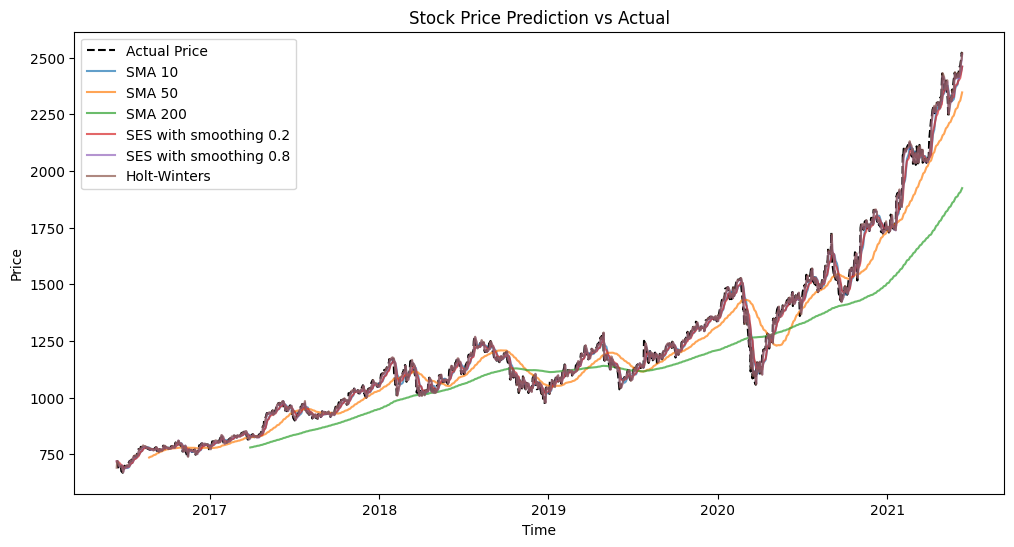

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(selected_df['close'], label='Actual Price', color='black', linestyle='dashed')
plt.plot(selected_df['SMA10'], label='SMA 10', alpha=0.7)
plt.plot(selected_df['SMA50'], label='SMA 50', alpha=0.7)
plt.plot(selected_df['SMA200'], label='SMA 200', alpha=0.7)
plt.plot(selected_df['SES_0.2'], label='SES with smoothing 0.2', alpha=0.7)
plt.plot(selected_df['SES_0.8'], label='SES with smoothing 0.8', alpha=0.7)
plt.plot(selected_df['Holt_Winters'], label='Holt-Winters', alpha=0.7)

plt.legend()
plt.title("Stock Price Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rmse, mape

# Make the data the same size
# Make the data of both columns not contain NaN at the same time.

valid_data_sma10 = selected_df[['close', 'SMA10']].dropna()
mae_sma10, mse_sma10, rmse_sma10, mape_sma10 = evaluate(valid_data_sma10['close'], valid_data_sma10['SMA10'])

valid_data_sma50 = selected_df[['close', 'SMA50']].dropna()
mae_sma50, mse_sma50, rmse_sma50, mape_sma50 = evaluate(valid_data_sma50['close'], valid_data_sma50['SMA50'])

valid_data_sma200 = selected_df[['close', 'SMA200']].dropna()
mae_sma200, mse_sma200, rmse_sma200, mape_sma200 = evaluate(valid_data_sma200['close'], valid_data_sma200['SMA200'])

valid_data_ses_point2 = selected_df[['close', 'SES_0.2']].dropna()
mae_ses_point2, mse_ses_point2, rmse_ses_point2, mape_ses_point2 = evaluate(valid_data_ses_point2['close'], valid_data_ses_point2['SES_0.2'])

valid_data_ses_point8 = selected_df[['close', 'SES_0.8']].dropna()
mae_ses_point8, mse_ses_point8, rmse_ses_point8, mape_ses_point8 = evaluate(valid_data_ses_point8['close'], valid_data_ses_point8['SES_0.8'])

valid_data_hw = selected_df[['close', 'Holt_Winters']].dropna()
mae_hw, mse_hw, rmse_hw, mape_hw = evaluate(valid_data_hw['close'], valid_data_hw['Holt_Winters'])

print("SMA_10:", mae_sma10, mse_sma10, rmse_sma10, mape_sma10)
print("SMA_50:", mae_sma50, mse_sma50, rmse_sma50, mape_sma50)
print("SMA_200:", mae_sma200, mse_sma200, rmse_sma200, mape_sma200)
print("SES_0.2:", mae_ses_point2, mse_ses_point2, rmse_ses_point2, mape_ses_point2)
print("SES_0.8:", mae_ses_point8, mse_ses_point8, rmse_ses_point8, mape_ses_point8)
print("Holt-Winters:", mae_hw, mse_hw, rmse_hw, mape_hw)




SMA_10: 24.41535308246598 1207.906012957967 34.75494228103346 1.9340330180130798
SMA_50: 62.6047958643507 7169.517393829232 84.67300274484916 4.733762652662937
SMA_200: 138.3648868508026 35790.36210377224 189.1834086376822 9.503625278195784
SES_0.2: 24.182762175553854 1200.4171284781294 34.647036359234676 1.911924450205489
SES_0.8: 14.431119538517162 490.99430780300116 22.158391363160845 1.1507840893333894
Holt-Winters: 14.226428893625572 481.67192164262275 21.947025348384294 1.139219326348688


In [23]:
"""
1. MAE (Mean Absolute Error) – The average absolute error (the lower, the better).

2. MSE (Mean Squared Error) – The squared error (gives more weight to large errors, the lower, the better).

3. RMSE (Root Mean Squared Error) – Similar to MSE but with the same unit as the data (the lower, the better).

4. MAPE (Mean Absolute Percentage Error) – The average percentage error (the lower, the better).

So, We will choose Holt-Winters Exponential Smoothing.

"""

print("So, We will choose Holt-Winters Exponential Smoothing.")


So, We will choose Holt-Winters Exponential Smoothing.
